# Extensive Example

In [1]:
import piscola

print(f'PISCOLA version: v{piscola.__version__}')

PISCOLA version: v2.0.0rc1


In this example, we will use a different SN. We will use SN 2008gp, a well-sampled low-*z* SN observed by the Carnegie Supernova Project (CSP).

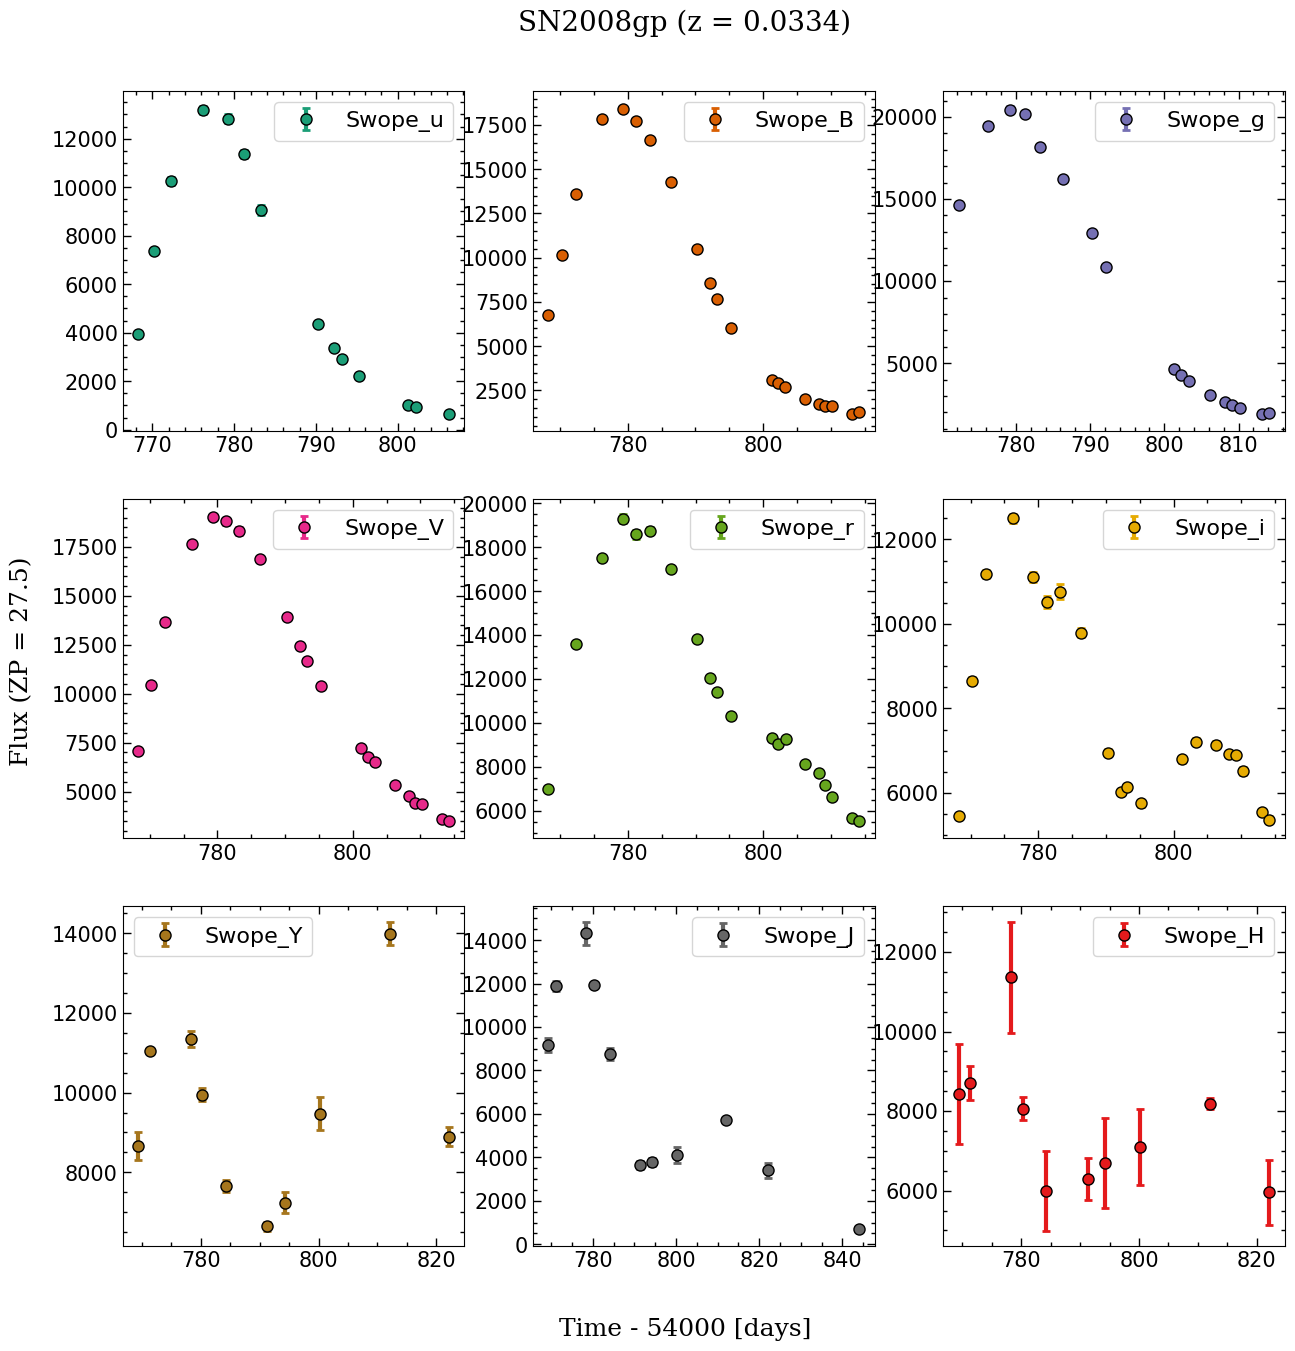

In [9]:
sn = piscola.call_sn('SN2008gp.dat')
sn.plot_lcs()

PISCOLA gives the option of simply fitting the light curves with Gaussian Process using the `sn.fit_lcs()` functions. This estimates the optical (*B*-band) peak. This information is then used to position the SED template for accurate *K*-correction when using `sn.fit()`.

<div class="alert alert-block alert-warning">
<b>Warning:</b> the sn.fit() function already calls sn.fit_lcs() internally.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> use the sn.fit_lcs() if you don't want to assume any light-curve information (fully data-driven approach). In principle, this can be used with any transient.
</div>

In [10]:
sn.fit_lcs()

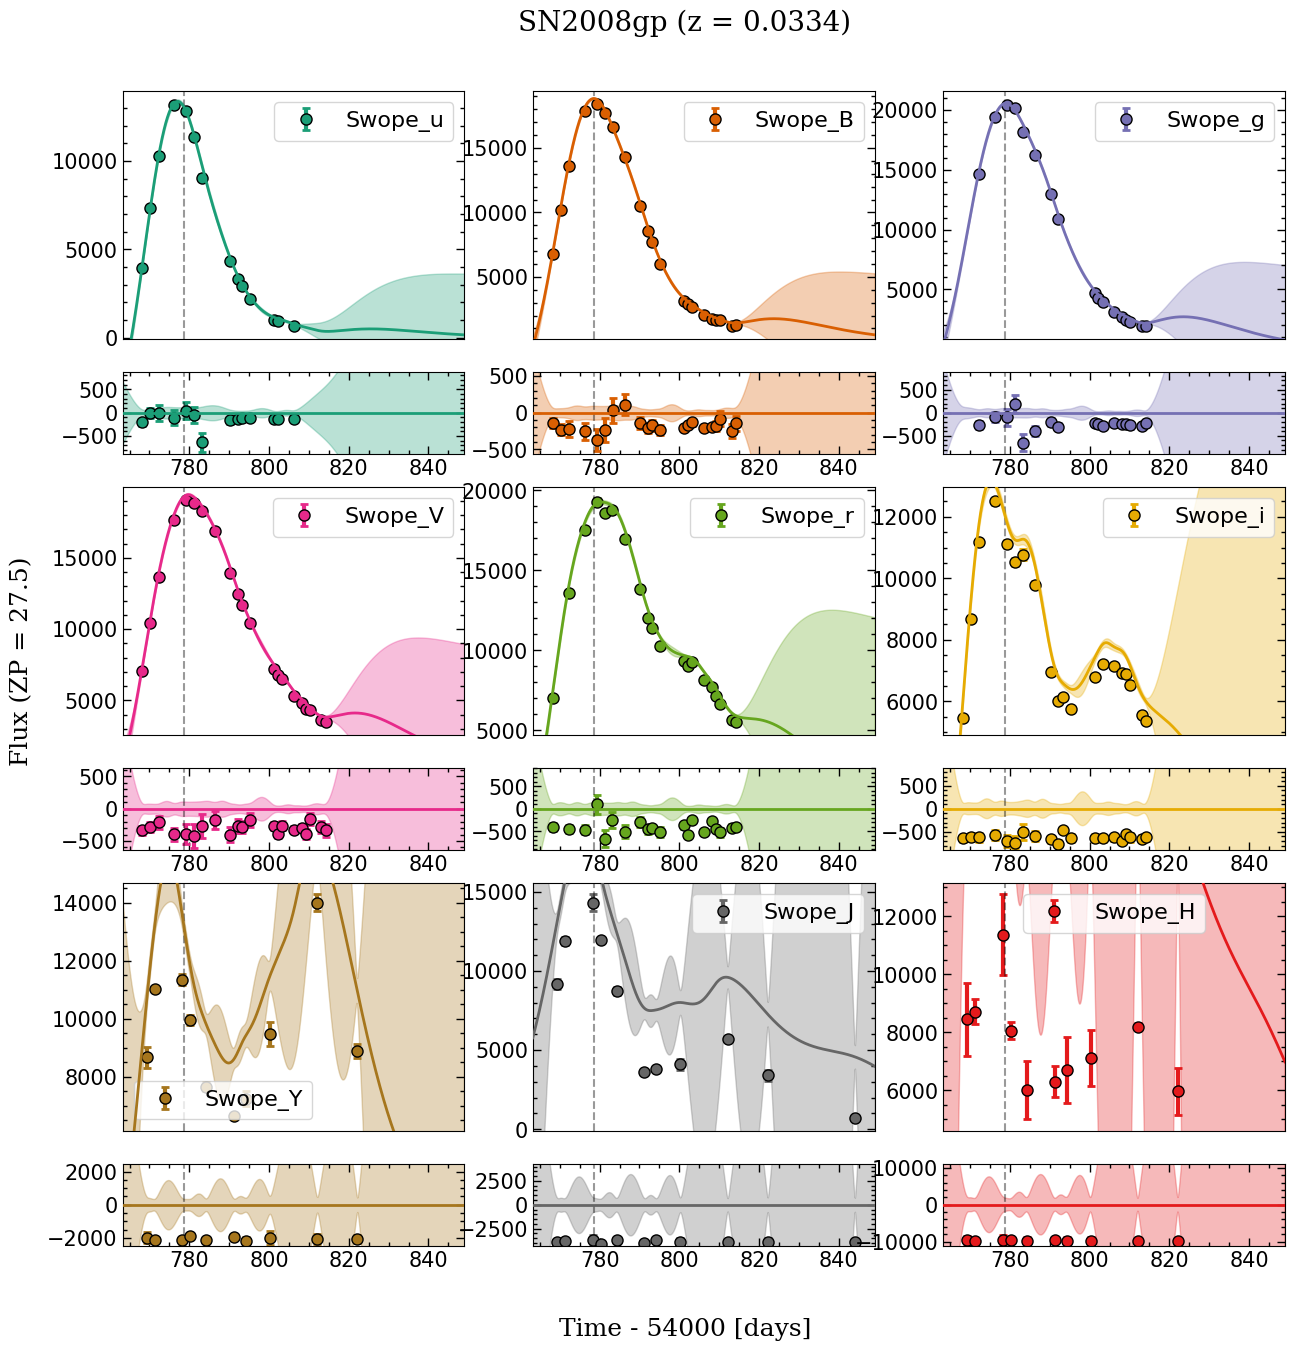

In [11]:
sn.plot_fits()

In this case, we see that PISCOLA does a good job fititng the optical light curves, but not so well with the near-infrared (NIR) light curves (*YJH*). If the aim is to fit with an SED template, this is fine as we only need the time of optical peak (`sn.init_tmax`).

In [13]:
sn.init_tmax, sn.init_tmax_err

(54778.712, 0.178)

We can now use `sn.fit()` with the argument `skip_lcs_fit=True` so PISCOLA doesn't waste time doing the initial fit again.

In [14]:
sn.fit(skip_lcs_fit=True)

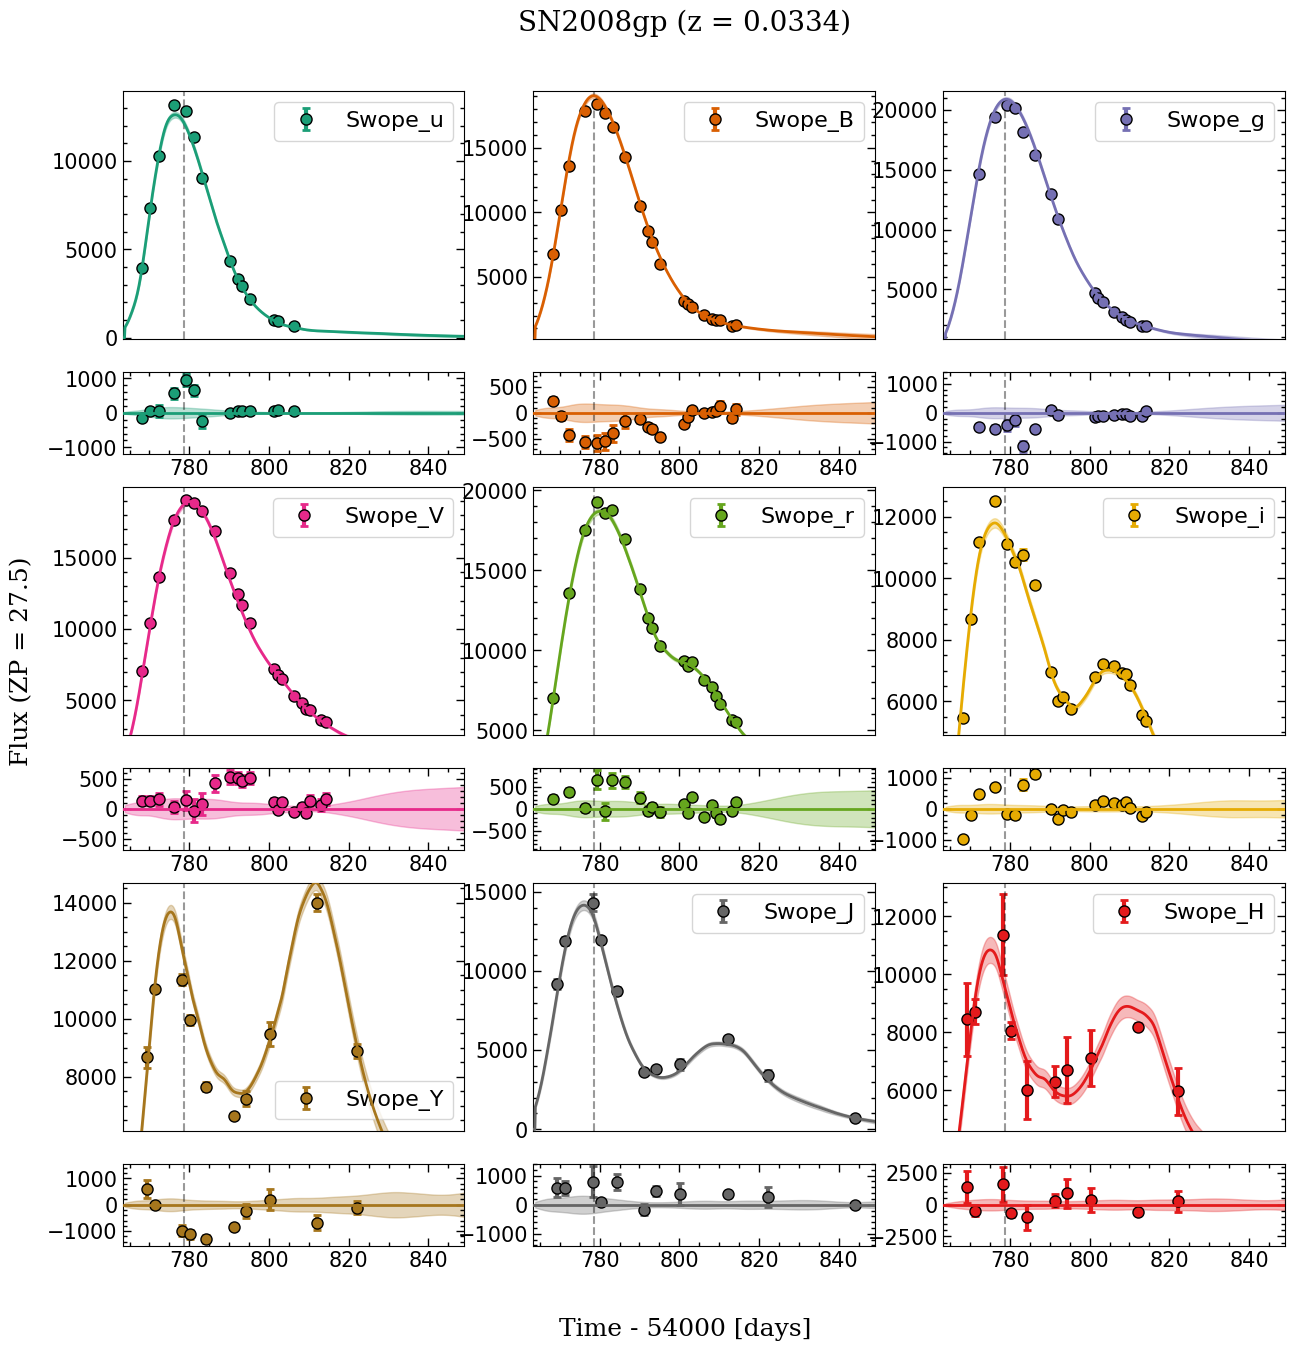

In [15]:
sn.plot_fits()

In [16]:
sn.tmax, sn.tmax_err

(54778.66, 0.212)

The fit looks much better than the previous one.

## GP fit - no SED template

If the user wants to use the initial Gaussian Process fit to the multi-colour light curves, there are a few ways in which one can improve this fit.

Apart from playing around with the parameters of `sn.fit_lcs()`, one can fit the optical and NIR light curves independenly. This is not ideal, but is a workaround:

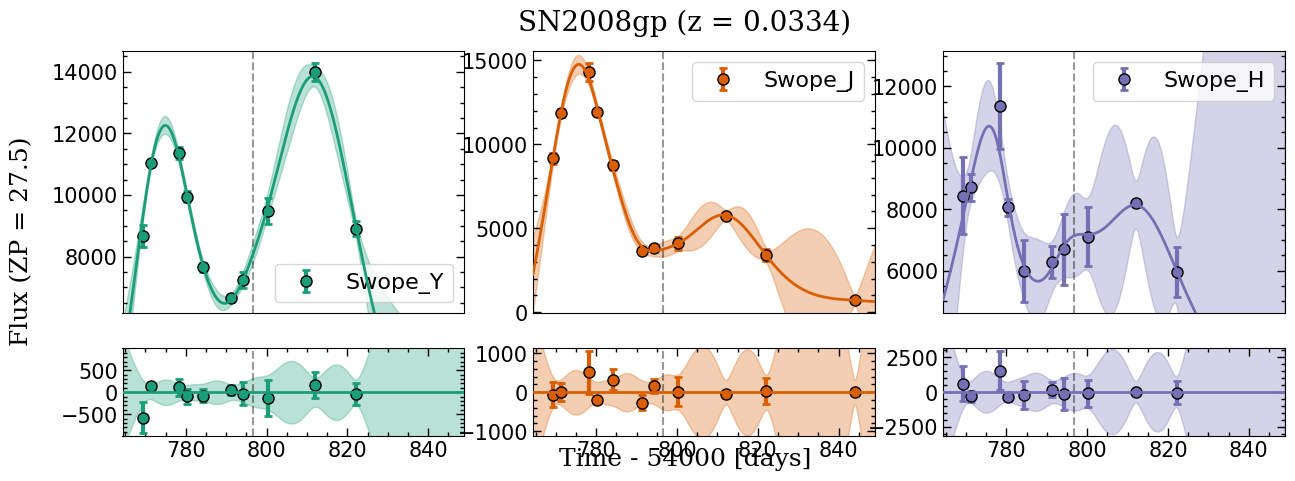

In [24]:
sn = piscola.call_sn('SN2008gp.dat')

sn.fit_lcs(sn.bands[-3:])
sn.plot_fits()

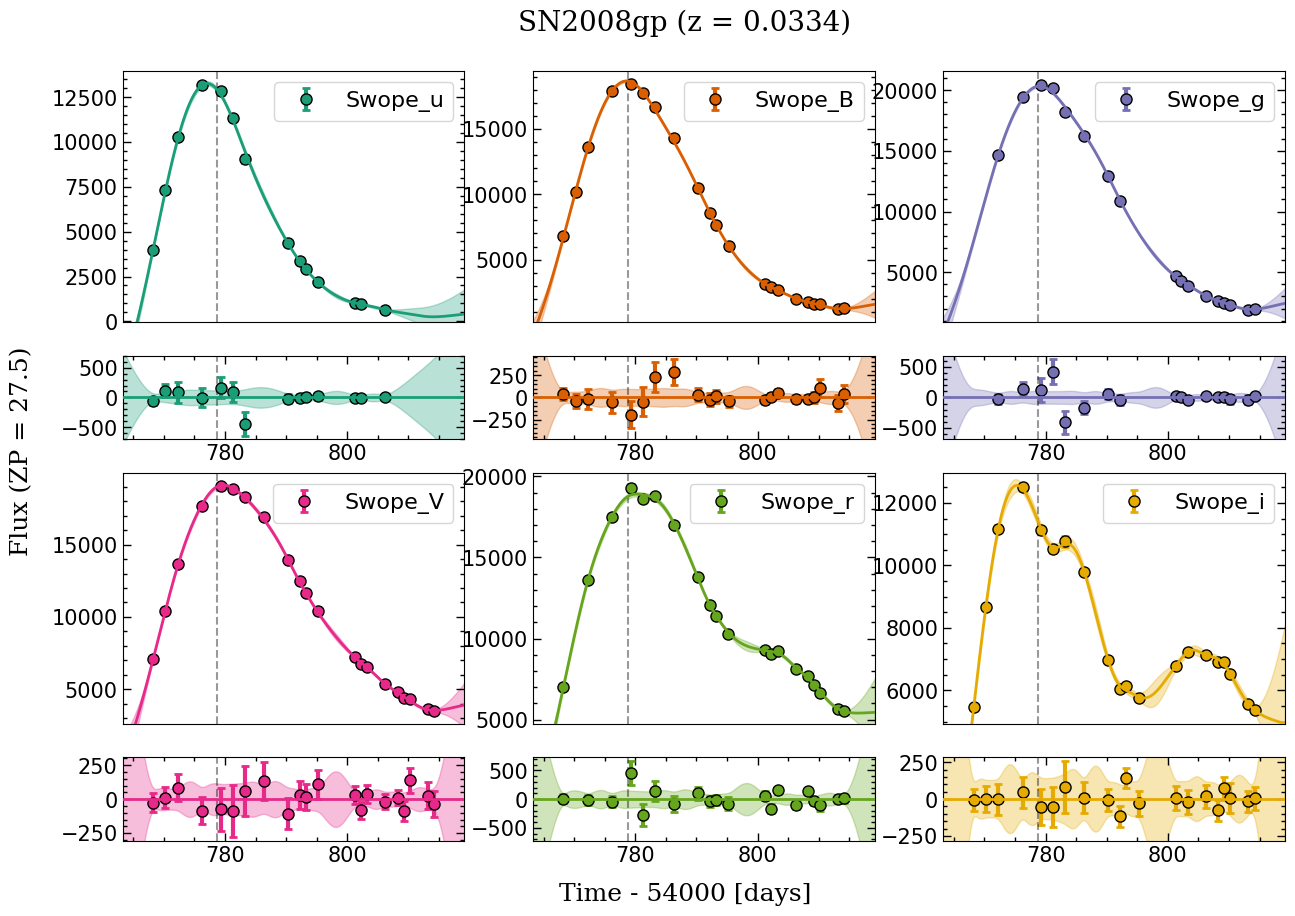

In [25]:
sn.fit_lcs(sn.bands[:6])
sn.plot_fits()

Note that the NIR is fitted first as `sn.fit_lcs()` replaces `sn.init_tmax` with the lattest fit.

Another option is to fit the light curves in logarithmic space, which solves the issues caused by the difference in scale between optical and NIR light curves

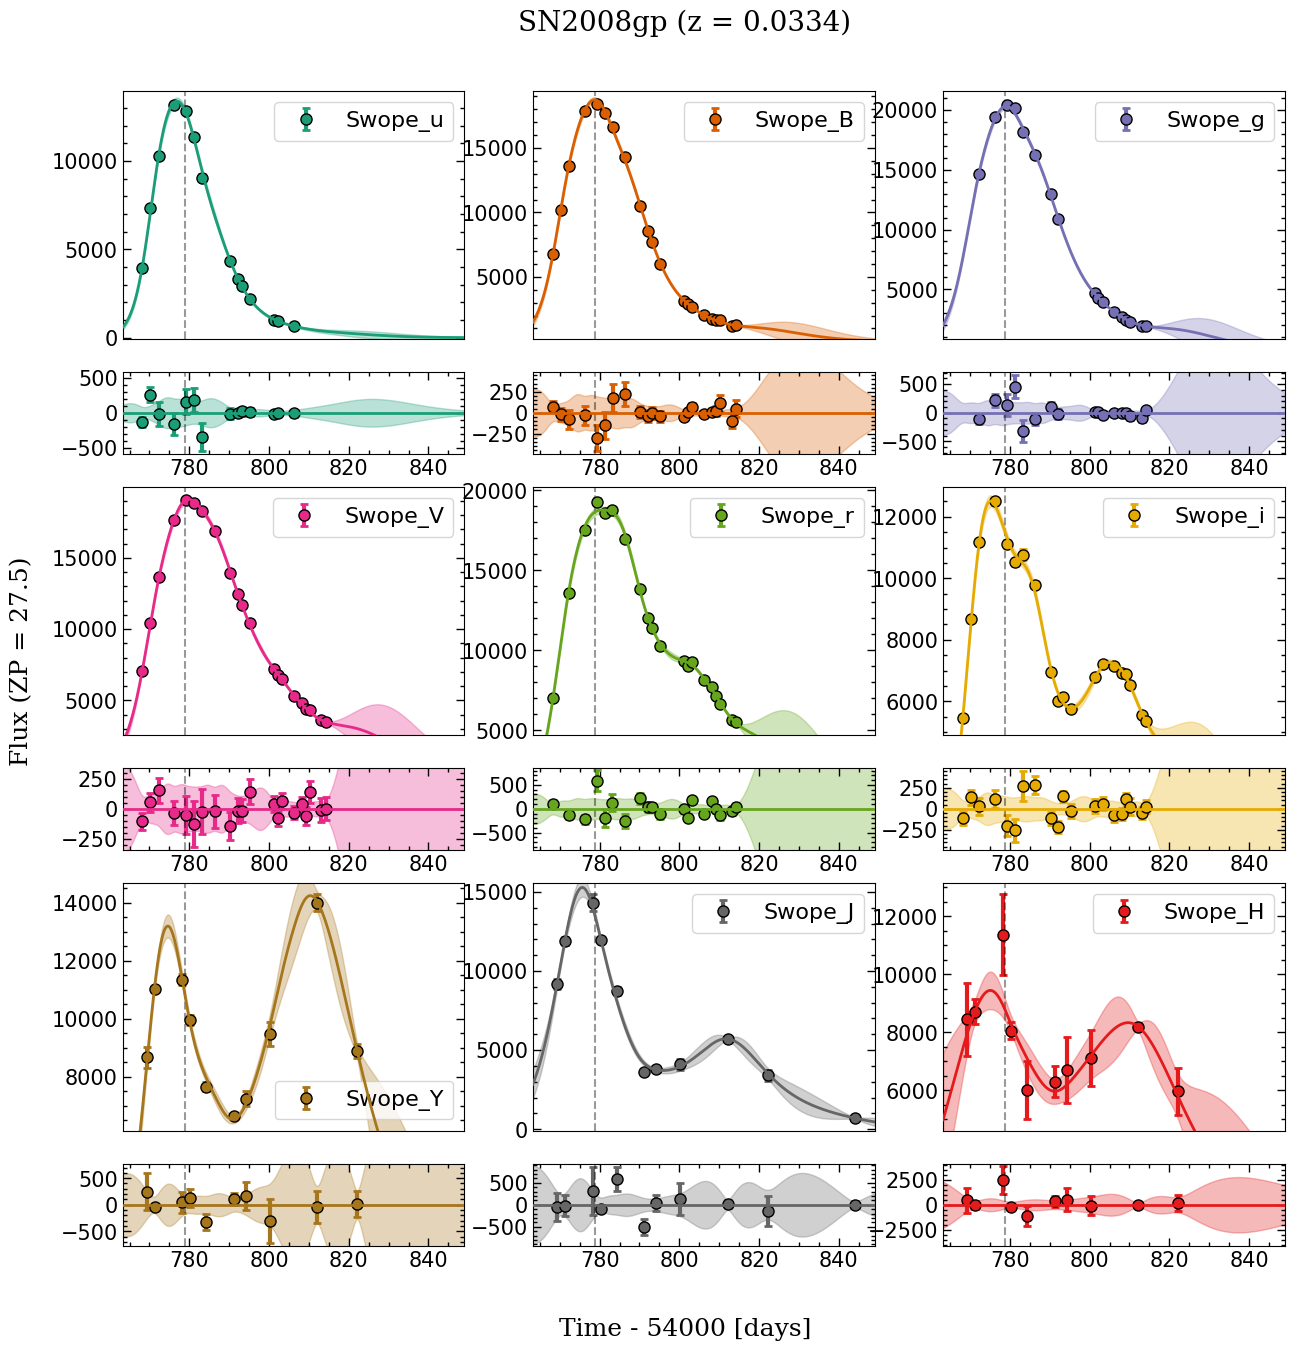

In [26]:
sn = piscola.call_sn('SN2008gp.dat')

sn.fit_lcs(fit_log=True)
sn.plot_fits()

<div class="alert alert-block alert-danger">
<b>Warning:</b> have in mind the possible drawbacks of fitting in logarithmic scale. Only do it if you are well aware of these!
</div>